In [1]:
import os
import sys
import glob
import shutil
from pathlib import Path
from kalpana.downscaling import meshRepLen2raster
from kalpana.downscaling import runStatic
from IPython.display import display, Image

This script creates a grass location importing the DEM for downscaling and also creates
a new DEM with same resolution and extend with the size of the mesh triangles. This step
is key for the downscaling and can be run in advance, because only depends on the mesh.

In [2]:
cwd = Path(os.getcwd())
fort14 = str(cwd.parent.parent/'adds'/'inputs_examples'/'fort.14') ## path of the fort.14 file
epsgIn = 4326 ## CRS for lat/lon
epsgOut = 6346 ## CRS of downscaling DEM
pathOut = os.path.join(cwd, 'NC_CoNED_subset_100m_mesh.shp') ## full path of the output shapefile 
grassVer = 8.3 ## version of grass 8.2 and 8.3 works
pathRasFiles = str(cwd.parent.parent/'adds'/'inputs_examples')
rasterFiles = 'NC_CoNED_subset_100m.tif'
## in this case we will use the same downscaling raster bounding box as the subdomain. 
subDomain = os.path.join(pathRasFiles, rasterFiles)
nameGrassLocation=None
createGrassLocation=True
createLocMethod='from_raster'

In [3]:
meshRepLen2raster(fort14, epsgIn, epsgOut, pathOut, grassVer, pathRasFiles, rasterFiles, 
                  subDomain=subDomain, nameGrassLocation=nameGrassLocation, 
                  createGrassLocation=createGrassLocation, 
                  createLocMethod=createLocMethod)

2024-07-07 14:53:13.367 | INFO     | kalpana.downscaling:meshRepLen2raster:891 - Mesh created: 0.002 min
2024-07-07 14:53:13.410 | INFO     | kalpana.downscaling:meshRepLen2raster:898 - Clip mesh using subfomain: 0.001 min
2024-07-07 14:53:13.575 | INFO     | kalpana.downscaling:meshRepLen2raster:906 - Export mesh gdf as shapefile: 0.003 min
2024-07-07 14:53:13.609 | INFO     | kalpana.downscaling:meshRepLen2raster:920 -     Start Setup grass environment
2024-07-07 14:53:13.610 | INFO     | kalpana.downscaling:setGrassEnv:337 -         rasters to list:  0.000 min
2024-07-07 14:53:13.737 | INFO     | kalpana.downscaling:setGrassEnv:341 -         create location:  0.002 min
2024-07-07 14:53:13.739 | INFO     | kalpana.downscaling:setGrassEnv:347 -         init grass:  0.000 min
2024-07-07 14:53:14.047 | INFO     | kalpana.downscaling:setGrassEnv:352 -         import raster:  0.005 min
2024-07-07 14:53:14.112 | INFO     | kalpana.downscaling:setGrassEnv:356 -         set downscaling dem: 

In [4]:
## clean
for f in glob.glob("NC_CoNED_subset_100m*"):
    os.remove(f)

for f in glob.glob("downscaling_dem*"):
    os.remove(f)

shutil.rmtree('grassLoc')

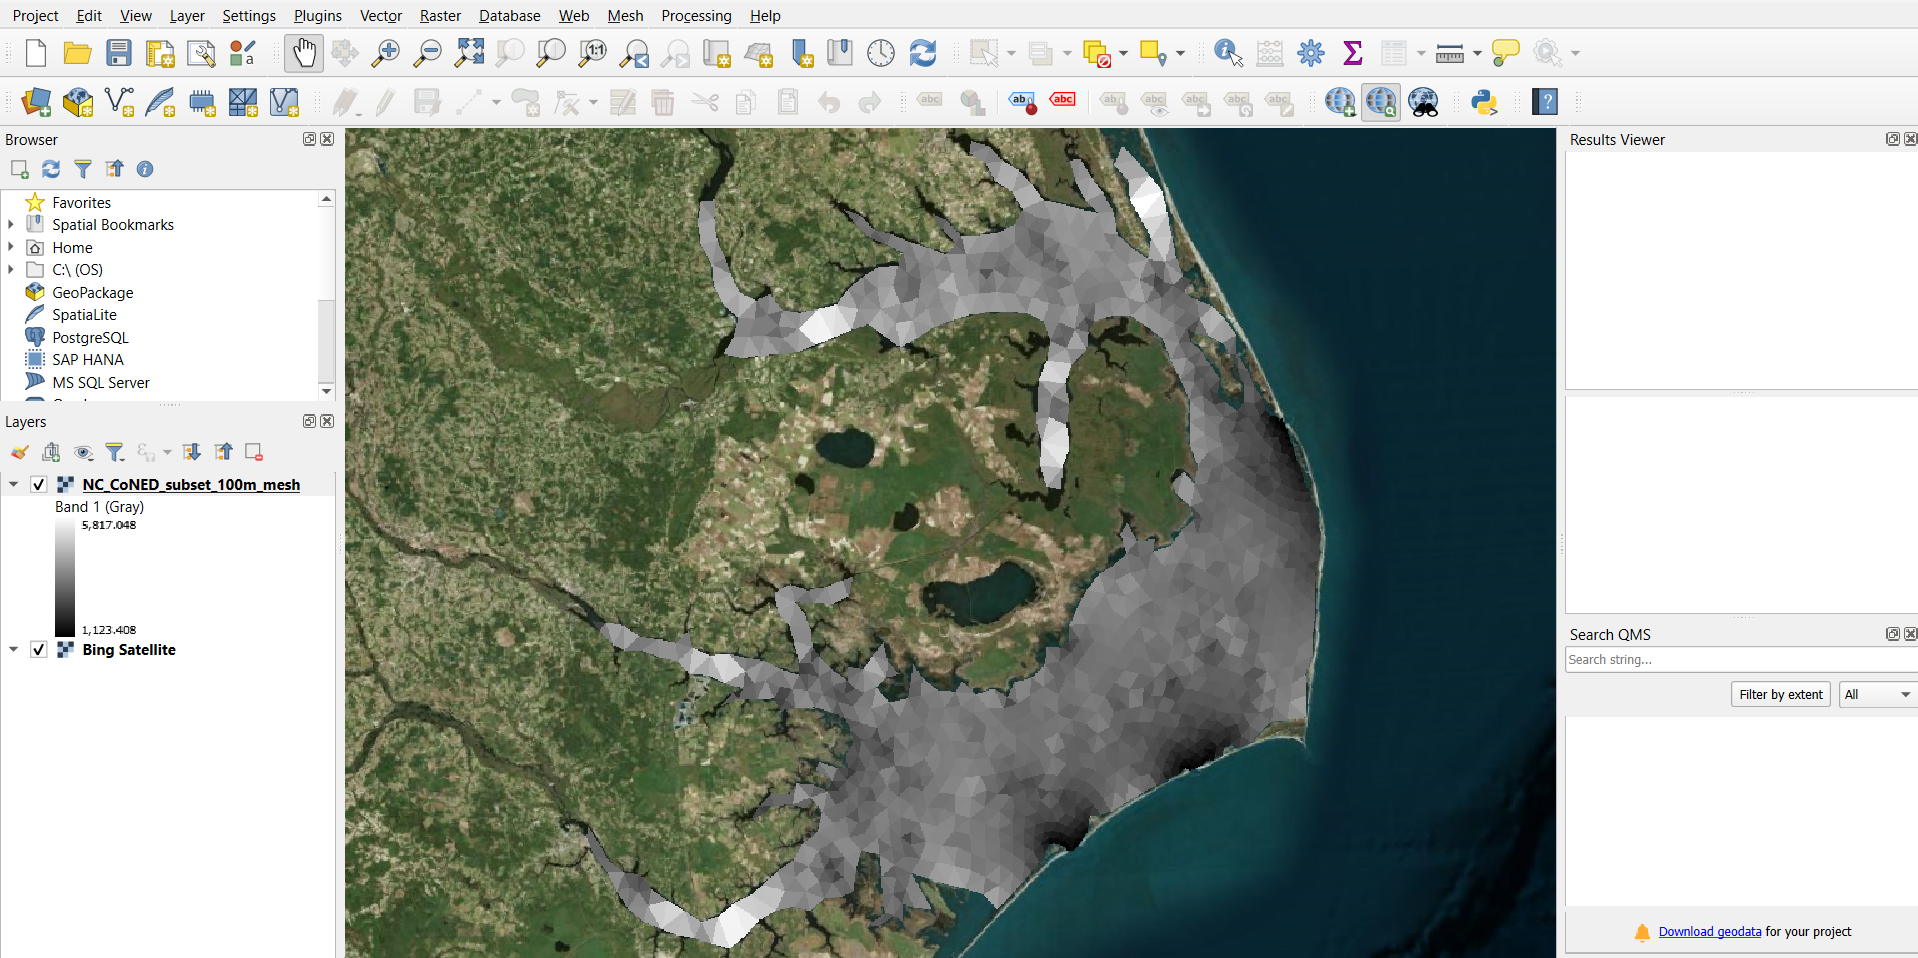

In [3]:
##Displays what the mesh should look like
display(Image(filename=r'../../adds/imgs/example_01_downscaling.png', width = 712))